In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
ROOT_FOLDER = '/content/drive/MyDrive/'

In [5]:
# data is now our pandas DataFrame containing all of the data from our csv file
df = pd.read_csv(ROOT_FOLDER + "eviction_num_by_muni.csv",index_col=0)

In [6]:
# data is now our pandas DataFrame containing all of the data from our csv file
household = pd.read_csv(ROOT_FOLDER + "household_muni.csv",index_col=0)

In [7]:
household_new = pd.merge(household, df[df.index.isin(household.index)], left_on=household.index, right_on=df[df.index.isin(household.index)].index)
household_new = household_new.drop(['Eviction Numbers'], axis=1)
household_new.rename(columns={'key_0':'Muni'}, inplace=True)
household_new = household_new.drop('Evictions per Rented Households', axis=1)
household_new['Evictions per Rented Households']= household_new[' eviction_num']/household_new['Renter Occupied']
household_new = household_new.sort_values('Evictions per Rented Households', ascending=False)


In [ ]:
# household

In [8]:
#income per household per municipality
income = pd.read_csv(ROOT_FOLDER+'2019_5Y_Income.csv',skiprows=1)
#occupation of people in municipalities
occupation = pd.read_csv(ROOT_FOLDER+'2019_5Y_Occupation.csv',skiprows=1)
#educational attainments of people in a municipality
edu = pd.read_csv(ROOT_FOLDER+'2019_5Y_EducationalAttainment.csv',skiprows=1)
#data of evictions
cdf = pd.read_csv(ROOT_FOLDER+'eviction_num_by_muni.csv')

counts = cdf[cdf['property_address_city'].isin(household.index)]
counts.rename(columns={'property_address_city':'Muni','eviction_num':'Eviction Numbers'},inplace=True)

# #data cleaning function 1
def df_clean(df):
    muni_list = []
    for x in range(df.shape[0]):
        wsplit = []
        wsplit = df.iloc[x]['Geographic Area Name'].split()
        word = ' '
        reject_list = ['town','Town','city','City','city,','City,','town,','Town,']
        for w in wsplit:
            if w in reject_list:
                break
            else:    
                word += ' ' + w 
        muni_list.append(word)    
    df['Geographic Area Name'] = muni_list
    df['Geographic Area Name'] = df['Geographic Area Name'].str.lstrip()
    df['Geographic Area Name'] = df['Geographic Area Name'].str.rstrip()    
    
    return df

#data cleaning function 2
def keep_estimates(idf):
    boolCols = idf.columns.str.contains('Estimate')
    newCols = list(idf.columns[0:2])
    for col in range(2,len(boolCols)):
        if boolCols[col] == True:
            newCols.append(idf.columns[col])
    df = idf[newCols]
    
    return df

income = df_clean(keep_estimates(income));
occupation = df_clean(keep_estimates(occupation));
edu = df_clean(keep_estimates(edu));

#Merging munis with corresponding socio-economic features
income_df =  pd.merge(counts,income,left_on='Muni',right_on='Geographic Area Name').drop(columns=['id','Geographic Area Name'])
occu_df =  pd.merge(counts,occupation,left_on='Muni',right_on='Geographic Area Name').drop(columns=['id','Geographic Area Name'])
edu_df =  pd.merge(counts,edu,left_on='Muni',right_on='Geographic Area Name').drop(columns=['id','Geographic Area Name'])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [9]:
income_with_rate = pd.merge(household_new, income_df, left_on=household_new['Muni'], right_on=income_df.Muni)
income_with_rate = income_with_rate.drop(['Muni_x', 'Muni_y', ' eviction_num_y'], axis=1)
income_with_rate.rename(columns={'key_0':'Muni', ' eviction_num_x': 'eviction_num'}, inplace=True)

In [10]:
income_with_rate

,Muni,Total Households,Renter Occupied Pct,Renter Occupied,eviction_num,Evictions per Rented Households,Estimate!!Households!!Total,"Estimate!!Households!!Total!!Less than $10,000","Estimate!!Households!!Total!!$10,000 to $14,999","Estimate!!Households!!Total!!$15,000 to $24,999","Estimate!!Households!!Total!!$25,000 to $34,999","Estimate!!Households!!Total!!$35,000 to $49,999","Estimate!!Households!!Total!!$50,000 to $74,999","Estimate!!Households!!Total!!$75,000 to $99,999","Estimate!!Households!!Total!!$100,000 to $149,999","Estimate!!Households!!Total!!$150,000 to $199,999","Estimate!!Households!!Total!!$200,000 or more",Estimate!!Households!!Median income (dollars),Estimate!!Households!!Mean income (dollars),Estimate!!Households!!PERCENT ALLOCATED!!Household income in the past 12 months,Estimate!!Households!!PERCENT ALLOCATED!!Family income in the past 12 months,Estimate!!Households!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Estimate!!Families!!Total,"Estimate!!Families!!Total!!Less than $10,000","Estimate!!Families!!Total!!$10,000 to $14,999","Estimate!!Families!!Total!!$15,000 to $24,999","Estimate!!Families!!Total!!$25,000 to $34,999","Estimate!!Families!!Total!!$35,000 to $49,999","Estimate!!Families!!Total!!$50,000 to $74,999","Estimate!!Families!!Total!!$75,000 to $99,999","Estimate!!Families!!Total!!$100,000 to $149,999","Estimate!!Families!!Total!!$150,000 to $199,999","Estimate!!Families!!Total!!$200,000 or more",Estimate!!Families!!Median income (dollars),Estimate!!Families!!Mean income (dollars),Estimate!!Families!!PERCENT ALLOCATED!!Household income in the past 12 months,Estimate!!Families!!PERCENT ALLOCATED!!Family income in the past 12 months,Estimate!!Families!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Estimate!!Married-couple families!!Total,"Estimate!!Married-couple families!!Total!!Less than $10,000","Estimate!!Married-couple families!!Total!!$10,000 to $14,999","Estimate!!Married-couple families!!Total!!$15,000 to $24,999","Estimate!!Married-couple families!!Total!!$25,000 to $34,999","Estimate!!Married-couple families!!Total!!$35,000 to $49,999","Estimate!!Married-couple families!!Total!!$50,000 to $74,999","Estimate!!Married-couple families!!Total!!$75,000 to $99,999","Estimate!!Married-couple families!!Total!!$100,000 to $149,999","Estimate!!Married-couple families!!Total!!$150,000 to $199,999","Estimate!!Married-couple families!!Total!!$200,000 or more",Estimate!!Married-couple families!!Median income (dollars),Estimate!!Married-couple families!!Mean income (dollars),Estimate!!Married-couple families!!PERCENT ALLOCATED!!Household income in the past 12 months,Estimate!!Married-couple families!!PERCENT ALLOCATED!!Family income in the past 12 months,Estimate!!Married-couple families!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Estimate!!Nonfamily households!!Total,"Estimate!!Nonfamily households!!Total!!Less than $10,000","Estimate!!Nonfamily households!!Total!!$10,000 to $14,999","Estimate!!Nonfamily households!!Total!!$15,000 to $24,999","Estimate!!Nonfamily households!!Total!!$25,000 to $34,999","Estimate!!Nonfamily households!!Total!!$35,000 to $49,999","Estimate!!Nonfamily households!!Total!!$50,000 to $74,999","Estimate!!Nonfamily households!!Total!!$75,000 to $99,999","Estimate!!Nonfamily households!!Total!!$100,000 to $149,999","Estimate!!Nonfamily households!!Total!!$150,000 to $199,999","Estimate!!Nonfamily households!!Total!!$200,000 or more",Estimate!!Nonfamily households!!Median income (dollars),Estimate!!Nonfamily households!!Mean income (dollars),Estimate!!Nonfamily households!!PERCENT ALLOCATED!!Household income in the past 12 months,Estimate!!Nonfamily households!!PERCENT ALLOCATED!!Family income in the past 12 months,Estimate!!Nonfamily households!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months
0,Rowe,191,9.4,17,3,0.176471,191,1.6,2.1,11.0,16.8,8.4,18.3,13.6,17.3,6.8,4.2,63750,78894,42.4,(X),(X),117,0.0,0.0,2.6,14.5,8.5,23.1,14.

In [11]:
# income_with_rate = income_with_rate.rename(columns={'Estimate!!Households!!Total!!Less than $10,000': 'Less than $10,000', 
#                                                     'Estimate!!Households!!Total!!$10,000 to $14,999': '$10,000 to $14,999', 
#                                                     'Estimate!!Households!!Total!!$15,000 to $24,999':'$15,000 to $24,999',
#                                                     'Estimate!!Households!!Total!!$25,000 to $34,999':'$25,000 to $34,999',
#                                                     ''})
income_with_rate['Less than $10,000'] = income_with_rate["Estimate!!Households!!Total!!Less than $10,000"].astype(float)
income_with_rate['$10,000 to $24,999'] = income_with_rate['Estimate!!Households!!Total!!$10,000 to $14,999'].astype(float) + income_with_rate['Estimate!!Households!!Total!!$15,000 to $24,999'].astype(float)
income_with_rate['$25,000 to $49,999'] = income_with_rate['Estimate!!Households!!Total!!$25,000 to $34,999'].astype(float) + income_with_rate['Estimate!!Households!!Total!!$35,000 to $49,999'].astype(float)
income_with_rate['$50,000 to $99,999'] = income_with_rate['Estimate!!Households!!Total!!$50,000 to $74,999'].astype(float) + income_with_rate['Estimate!!Households!!Total!!$75,000 to $99,999'].astype(float)
income_with_rate['$100,000 to $149,000'] = income_with_rate['Estimate!!Households!!Total!!$100,000 to $149,999'].astype(float)
income_with_rate['$150,000 or more'] = income_with_rate['Estimate!!Households!!Total!!$150,000 to $199,999'].astype(float) + income_with_rate['Estimate!!Households!!Total!!$200,000 or more'].astype(float)

In [12]:
income_with_rate['Median Income'] = income_with_rate['Estimate!!Households!!Median income (dollars)'].astype(str).replace('250,000+', '250000').astype(float)
income_with_rate['Percent of Income Allocated to Rent'] = income_with_rate['Estimate!!Households!!PERCENT ALLOCATED!!Household income in the past 12 months'].astype(float)

In [ ]:
# income_with_rate

In [13]:
#brackets
one_to_ten_k = pd.read_csv(ROOT_FOLDER+'CS506 - Data Science/1kTO10K.csv',skiprows=1)
ten_to_fifty_k = pd.read_csv(ROOT_FOLDER+'CS506 - Data Science/10kTO50K.csv',skiprows=1)
fifty_to_90_k = pd.read_csv(ROOT_FOLDER+'CS506 - Data Science/50kTO90K.csv',skiprows=1)
ninty_to_200_k = pd.read_csv(ROOT_FOLDER+'CS506 - Data Science/90kTO200K.csv',skiprows=1)

In [14]:
income_one_to_ten_k = income_with_rate[income_with_rate["Muni"].isin(one_to_ten_k.Middleton.append(pd.Series('Middleton')))]

low_median_1 = income_one_to_ten_k[income_one_to_ten_k['eviction_num'] >=20].sort_values('Evictions per Rented Households', ascending=False).head(5).filter(['Muni','Median Income'], axis=1)
top_median_1 = income_one_to_ten_k[income_one_to_ten_k['eviction_num'] >=10].sort_values('Evictions per Rented Households').head(5).filter(['Muni','Median Income'], axis=1)

In [15]:
median_1 = pd.concat([low_median_1, top_median_1.reindex(index=top_median_1.index[::-1])])

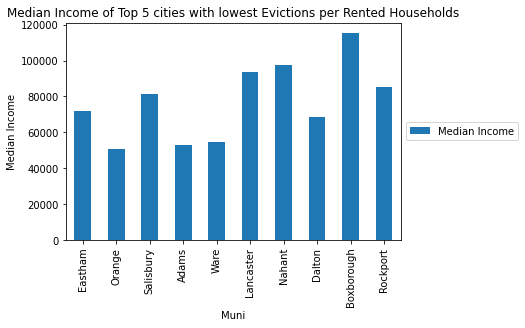

In [16]:
f = plt.figure()

plt.title('Median Income of Top 5 cities with lowest Evictions per Rented Households', color='black')
median_1.plot(x='Muni',kind='bar', stacked=True, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Muni")
plt.ylabel("Median Income")
plt.show()

In [17]:
income_ten_to_fifty_k = income_with_rate[income_with_rate["Muni"].isin(ten_to_fifty_k.Everett.append(pd.Series('Everett')))]
low_median_2 = income_ten_to_fifty_k.sort_values('Evictions per Rented Households', ascending=False).head(3).filter(['Muni','Median Income'], axis=1)
top_median_2 = income_ten_to_fifty_k.sort_values('Evictions per Rented Households').head(3).filter(['Muni','Median Income'], axis=1)

In [19]:
median_2 = pd.concat([low_median_2, top_median_2.reindex(index=top_median_2.index[::-1])])

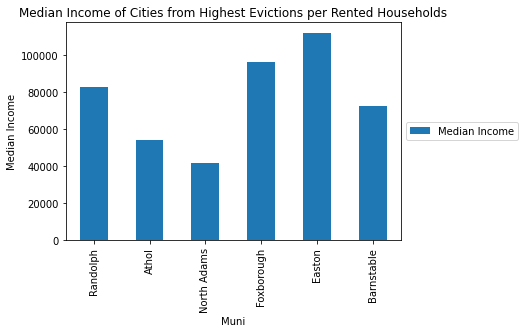

In [20]:
f = plt.figure()

plt.title('Median Income of Cities from Highest Evictions per Rented Households', color='black')
median_2.plot(x='Muni',kind='bar', stacked=True, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Muni")
plt.ylabel("Median Income")
plt.show()

In [21]:
income_fifty_to_90_k = income_with_rate[income_with_rate["Muni"].isin(fifty_to_90_k['Fall River'].append(pd.Series('Fall River')))]
low_median_3 = income_fifty_to_90_k[income_fifty_to_90_k['eviction_num'] >=10].sort_values('Evictions per Rented Households', ascending=False).head(5).filter(['Muni','Median Income'], axis=1)
top_median_3 = income_fifty_to_90_k[income_fifty_to_90_k['eviction_num'] >=10].sort_values('Evictions per Rented Households').head(5).filter(['Muni','Median Income'], axis=1)

In [23]:
median_3 = pd.concat([low_median_3, top_median_3.reindex(index=top_median_3.index[::-1])])

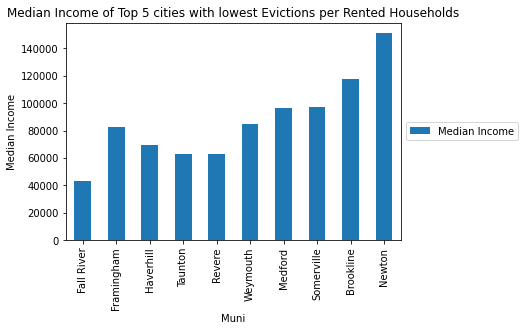

In [24]:
f = plt.figure()

plt.title('Median Income of Top 5 cities with lowest Evictions per Rented Households', color='black')
median_3.plot(x='Muni',kind='bar', stacked=True, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Muni")
plt.ylabel("Median Income")
plt.show()

In [25]:
income_ninty_to_200_k = income_with_rate[income_with_rate["Muni"].isin(ninty_to_200_k['Worcester'].append(pd.Series('Worcester')))]
median_4 = income_ninty_to_200_k[income_ninty_to_200_k['eviction_num'] >=10].sort_values('Evictions per Rented Households', ascending=False).filter(['Muni','Median Income'], axis=1)
#top_median_4 = income_ninty_to_200_k[income_ninty_to_200_k['eviction_num'] >=10].sort_values('Evictions per Rented Households').head(5).filter(['Muni','No High School Deploma', 'High School Deploma','No College Degree', 'Bachelors Degree or Higher'], axis=1)

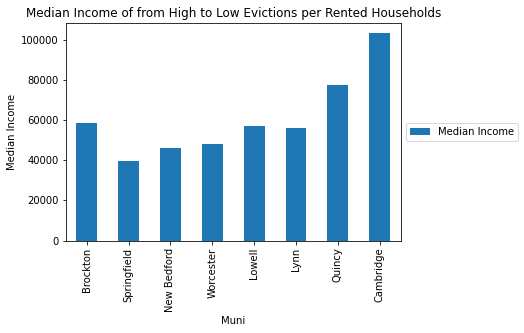

In [26]:
f = plt.figure()

plt.title('Median Income of from High to Low Evictions per Rented Households', color='black')
median_4.plot(x='Muni',kind='bar', stacked=True, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Muni")
plt.ylabel("Median Income")
plt.show()

In [36]:
income_ten_to_fifty_k['Median Income'].median()

96062.0

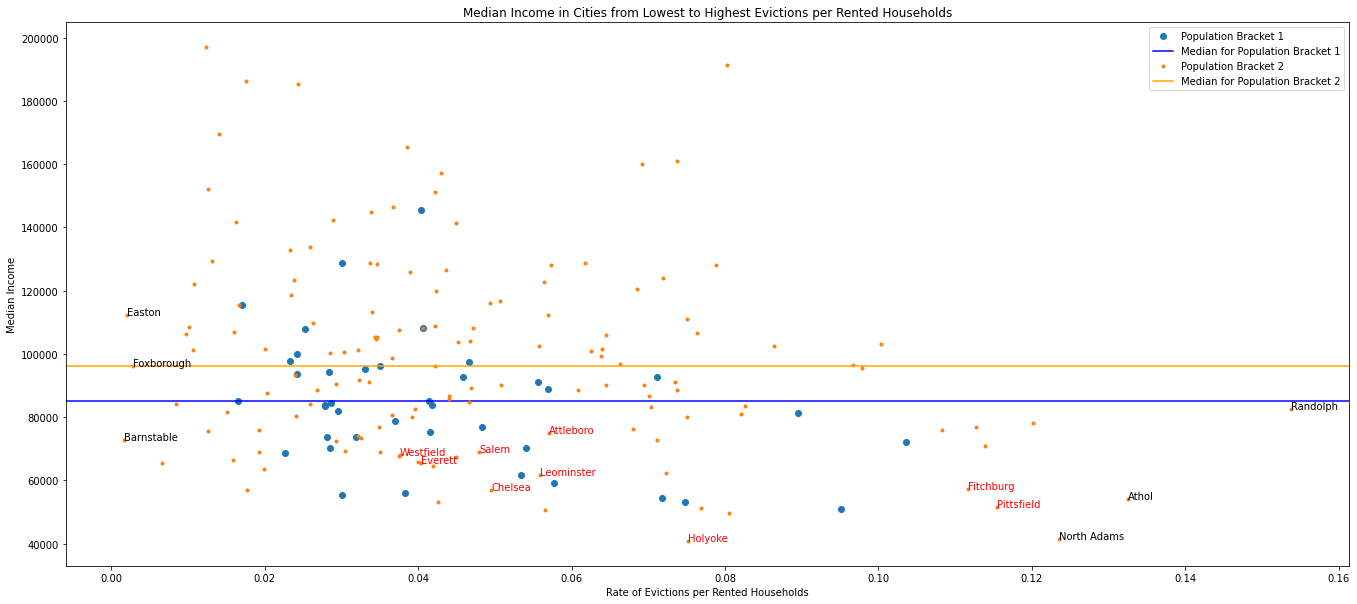

In [37]:
plt.figure(figsize=(23,10))


# rate_income = linear_model.LinearRegression().fit(np.array(income_one_to_ten_k[income_one_to_ten_k['eviction_num'] >=10]['Evictions per Rented Households'].tolist()).reshape(-1, 1), np.array(income_one_to_ten_k[income_one_to_ten_k['eviction_num'] >=10]["Median Income"]).tolist())
# regression_line = rate_income.predict(np.array(income_one_to_ten_k[income_one_to_ten_k['eviction_num'] >=10]['Evictions per Rented Households'].tolist()).reshape(-1, 1))
plt.plot(income_one_to_ten_k[income_one_to_ten_k['eviction_num'] >=10]['Evictions per Rented Households'], income_one_to_ten_k[income_one_to_ten_k['eviction_num'] >=10]["Median Income"], 'o',
             label="Population Bracket 1")
# plt.plot(income_one_to_ten_k[income_one_to_ten_k['eviction_num'] >=10]['Evictions per Rented Households'], regression_line, label='Best Fit Line', color='blue', linewidth=1)
plt.axhline(y=85204.0, label='Median for Population Bracket 1', color='b', linestyle='-')



# rate_income1 = linear_model.LinearRegression().fit(np.array(income_ten_to_fifty_k['Evictions per Rented Households'].tolist()).reshape(-1, 1), np.array(income_ten_to_fifty_k["Median Income"]).tolist())
# regression_line1 = rate_income1.predict(np.array(income_ten_to_fifty_k['Evictions per Rented Households'].tolist()).reshape(-1, 1))
# plt.plot(income_ten_to_fifty_k['Evictions per Rented Households'], regression_line1, label='Best Fit Line', color='orange', linewidth=1)
plt.plot(income_ten_to_fifty_k['Evictions per Rented Households'], income_ten_to_fifty_k["Median Income"], '.',
             label="Population Bracket 2")

plt.axhline(y=96062.0, label='Median for Population Bracket 2', color='orange', linestyle='-')

for city in (median_2["Muni"].tolist()):
  plt.annotate(city, (income_ten_to_fifty_k[income_ten_to_fifty_k["Muni"] == city]['Evictions per Rented Households'], 
                        income_ten_to_fifty_k[income_ten_to_fifty_k["Muni"] == city]["Median Income"]))

gateway_cities = ["Attleboro", "Brockton", "Chelsea", "Chicopee", "Everett", "Fall River", "Fitchburg", "Haverhill", "Holyoke",
                  "Lawrence", "Leominster", "Lowell", "Lynn", "Malden", 
                  "Methuen", "New Bedford", "Peabody", "Pittsfield", "Quincy", "Revere", "Salem", "Springfield", "Taunton", "Westfield", "Worcester"]
for city in gateway_cities: 
  if city in income_ten_to_fifty_k["Muni"].tolist():
    plt.annotate(city, (income_ten_to_fifty_k[income_ten_to_fifty_k["Muni"] == city]['Evictions per Rented Households'], 
                            income_ten_to_fifty_k[income_ten_to_fifty_k["Muni"] == city]["Median Income"]), color='Red')

plt.title('Median Income in Cities from Lowest to Highest Evictions per Rented Households', color='black')
plt.xlabel("Rate of Evictions per Rented Households")
plt.ylabel("Median Income")
plt.legend(numpoints=1)
# plt.xlim(0, 1.8);
plt.show()

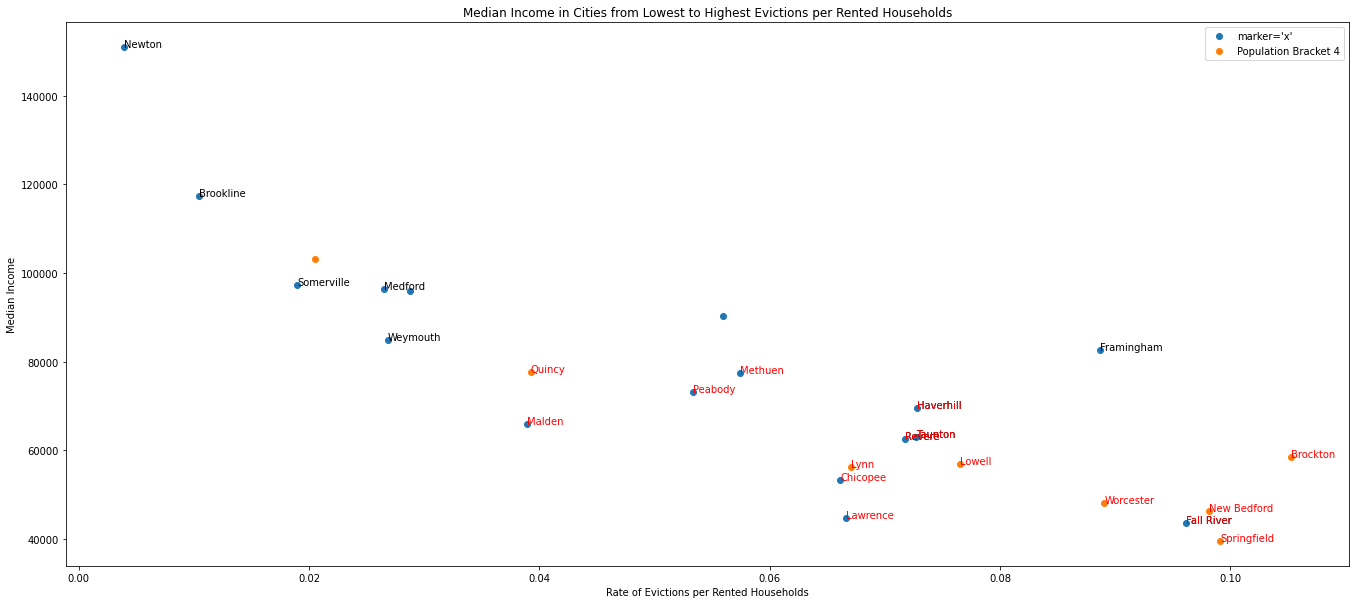

In [28]:
plt.figure(figsize=(23,10))

plt.plot(income_fifty_to_90_k['Evictions per Rented Households'], income_fifty_to_90_k['Median Income'], 'o',
             label="marker='{0}'".format('x'))

for city in (median_3["Muni"].tolist()):
  plt.annotate(city, (income_fifty_to_90_k[income_fifty_to_90_k["Muni"] == city]['Evictions per Rented Households'], 
                        income_fifty_to_90_k[income_fifty_to_90_k["Muni"] == city]["Median Income"]))

for city in gateway_cities: 
  if city in income_fifty_to_90_k["Muni"].tolist():
    plt.annotate(city, (income_fifty_to_90_k[income_fifty_to_90_k["Muni"] == city]['Evictions per Rented Households'], 
                            income_fifty_to_90_k[income_fifty_to_90_k["Muni"] == city]["Median Income"]), color='Red')



plt.plot(income_ninty_to_200_k['Evictions per Rented Households'], income_ninty_to_200_k['Median Income'], 'o',
             label="Population Bracket 4")

for city in gateway_cities: 
  if city in income_ninty_to_200_k["Muni"].tolist():
    plt.annotate(city, (income_ninty_to_200_k[income_ninty_to_200_k["Muni"] == city]['Evictions per Rented Households'], 
                            income_ninty_to_200_k[income_ninty_to_200_k["Muni"] == city]["Median Income"]), color='Red')

plt.title('Median Income in Cities from Lowest to Highest Evictions per Rented Households', color='black')
plt.xlabel("Rate of Evictions per Rented Households")
plt.ylabel("Median Income")
plt.legend(numpoints=1)
# plt.xlim(0, 1.8);
plt.show()

In [29]:
income_ten_to_fifty_k[income_ten_to_fifty_k["Muni"] == "Randolph"]

,Muni,Total Households,Renter Occupied Pct,Renter Occupied,eviction_num,Evictions per Rented Households,Estimate!!Households!!Total,"Estimate!!Households!!Total!!Less than $10,000","Estimate!!Households!!Total!!$10,000 to $14,999","Estimate!!Households!!Total!!$15,000 to $24,999","Estimate!!Households!!Total!!$25,000 to $34,999","Estimate!!Households!!Total!!$35,000 to $49,999","Estimate!!Households!!Total!!$50,000 to $74,999","Estimate!!Households!!Total!!$75,000 to $99,999","Estimate!!Households!!Total!!$100,000 to $149,999","Estimate!!Households!!Total!!$150,000 to $199,999","Estimate!!Households!!Total!!$200,000 or more",Estimate!!Households!!Median income (dollars),Estimate!!Households!!Mean income (dollars),Estimate!!Households!!PERCENT ALLOCATED!!Household income in the past 12 months,Estimate!!Households!!PERCENT ALLOCATED!!Family income in the past 12 months,Estimate!!Households!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Estimate!!Families!!Total,"Estimate!!Families!!Total!!Less than $10,000","Estimate!!Families!!Total!!$10,000 to $14,999","Estimate!!Families!!Total!!$15,000 to $24,999","Estimate!!Families!!Total!!$25,000 to $34,999","Estimate!!Families!!Total!!$35,000 to $49,999","Estimate!!Families!!Total!!$50,000 to $74,999","Estimate!!Families!!Total!!$75,000 to $99,999","Estimate!!Families!!Total!!$100,000 to $149,999","Estimate!!Families!!Total!!$150,000 to $199,999","Estimate!!Families!!Total!!$200,000 or more",Estimate!!Families!!Median income (dollars),Estimate!!Families!!Mean income (dollars),Estimate!!Families!!PERCENT ALLOCATED!!Household income in the past 12 months,Estimate!!Families!!PERCENT ALLOCATED!!Family income in the past 12 months,Estimate!!Families!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Estimate!!Married-couple families!!Total,"Estimate!!Married-couple families!!Total!!Less than $10,000","Estimate!!Married-couple families!!Total!!$10,000 to $14,999","Estimate!!Married-couple families!!Total!!$15,000 to $24,999","Estimate!!Married-couple families!!Total!!$25,000 to $34,999","Estimate!!Married-couple families!!Total!!$35,000 to $49,999","Estimate!!Married-couple families!!Total!!$50,000 to $74,999","Estimate!!Married-couple families!!Total!!$75,000 to $99,999","Estimate!!Married-couple families!!Total!!$100,000 to $149,999","Estimate!!Married-couple families!!Total!!$150,000 to $199,999","Estimate!!Married-couple families!!Total!!$200,000 or more",Estimate!!Married-couple families!!Median income (dollars),Estimate!!Married-couple families!!Mean income (dollars),Estimate!!Married-couple families!!PERCENT ALLOCATED!!Household income in the past 12 months,Estimate!!Married-couple families!!PERCENT ALLOCATED!!Family income in the past 12 months,Estimate!!Married-couple families!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Estimate!!Nonfamily households!!Total,"Estimate!!Nonfamily households!!Total!!Less than $10,000","Estimate!!Nonfamily households!!Total!!$10,000 to $14,999","Estimate!!Nonfamily households!!Total!!$15,000 to $24,999","Estimate!!Nonfamily households!!Total!!$25,000 to $34,999","Estimate!!Nonfamily households!!Total!!$35,000 to $49,999","Estimate!!Nonfamily households!!Total!!$50,000 to $74,999","Estimate!!Nonfamily households!!Total!!$75,000 to $99,999","Estimate!!Nonfamily households!!Total!!$100,000 to $149,999","Estimate!!Nonfamily households!!Total!!$150,000 to $199,999","Estimate!!Nonfamily households!!Total!!$200,000 or more",Estimate!!Nonfamily households!!Median income (dollars),Estimate!!Nonfamily households!!Mean income (dollars),Estimate!!Nonfamily households!!PERCENT ALLOCATED!!Household income in the past 12 months,Estimate!!Nonfamily households!!PERCENT ALLOCATED!!Family income in the past 12 months,Estimate!!Nonfamily households!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,"Less than $10,000","$10,000 to $24,999","$25,000 to $49,999","$50,000 to $99,999","$100,000 to $149,000","$150,000 or more",Median Inco

In [30]:
income_with_rate['Less than $15,000'] = income_with_rate["Estimate!!Households!!Total!!Less than $10,000"].astype(float) + income_with_rate['Estimate!!Households!!Total!!$10,000 to $14,999'].astype(float)
income_with_rate['$15,000 to $49,999'] = income_with_rate['Estimate!!Households!!Total!!$15,000 to $24,999'].astype(float) + income_with_rate['Estimate!!Households!!Total!!$25,000 to $34,999'].astype(float) + income_with_rate['Estimate!!Households!!Total!!$35,000 to $49,999'].astype(float)
income_with_rate['$50,000 to $99,999'] = income_with_rate['Estimate!!Households!!Total!!$50,000 to $74,999'].astype(float) + income_with_rate['Estimate!!Households!!Total!!$75,000 to $99,999'].astype(float)
income_with_rate['$100,000 to $149,000'] = income_with_rate['Estimate!!Households!!Total!!$100,000 to $149,999'].astype(float)
income_with_rate['$150,000 or more'] = income_with_rate['Estimate!!Households!!Total!!$150,000 to $199,999'].astype(float) + income_with_rate['Estimate!!Households!!Total!!$200,000 or more'].astype(float)

In [31]:
income_one_to_ten_k = income_with_rate[income_with_rate["Muni"].isin(one_to_ten_k.Middleton.append(pd.Series('Middleton')))]

low_5_1 = income_one_to_ten_k[income_one_to_ten_k['eviction_num'] >=20].sort_values('Evictions per Rented Households', ascending=False).head(5).filter(['Muni','Less than $15,000', '$15,000 to $49,999', '$50,000 to $99,999', '$100,000 to $149,000', '$150,000 or more'], axis=1)
top_5_1 = income_one_to_ten_k[income_one_to_ten_k['eviction_num'] >=10].sort_values('Evictions per Rented Households').head(5).filter(['Muni','Less than $15,000', '$15,000 to $49,999', '$50,000 to $99,999', '$100,000 to $149,000', '$150,000 or more'], axis=1)

income_1 = pd.concat([low_5_1, top_5_1.reindex(index=top_5_1.index[::-1])])

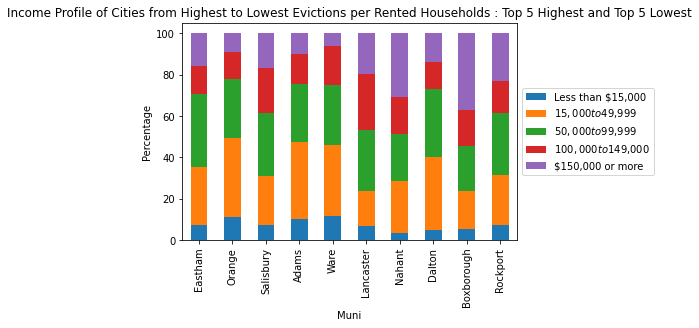

In [28]:
f = plt.figure()

plt.title('Income Profile of Cities from Highest to Lowest Evictions per Rented Households : Top 5 Highest and Top 5 Lowest', color='black')
income_1.plot(x='Muni', kind='bar', stacked=True, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Muni")
plt.ylabel("Percentage")
plt.show()

In [32]:
income_ten_to_fifty_k = income_with_rate[income_with_rate["Muni"].isin(ten_to_fifty_k.Everett.append(pd.Series('Everett')))]

low_5_2 = income_ten_to_fifty_k[income_ten_to_fifty_k['eviction_num'] >=10].sort_values('Evictions per Rented Households', ascending=False).head(5).filter(['Muni','Less than $15,000', '$15,000 to $49,999', '$50,000 to $99,999', '$100,000 to $149,000', '$150,000 or more'], axis=1)
top_5_2 = income_ten_to_fifty_k[income_ten_to_fifty_k['eviction_num'] >=10].sort_values('Evictions per Rented Households').head(5).filter(['Muni','Less than $15,000', '$15,000 to $49,999', '$50,000 to $99,999', '$100,000 to $149,000', '$150,000 or more'], axis=1)

income_2 = pd.concat([low_5_2, top_5_2.reindex(index=top_5_2.index[::-1])])

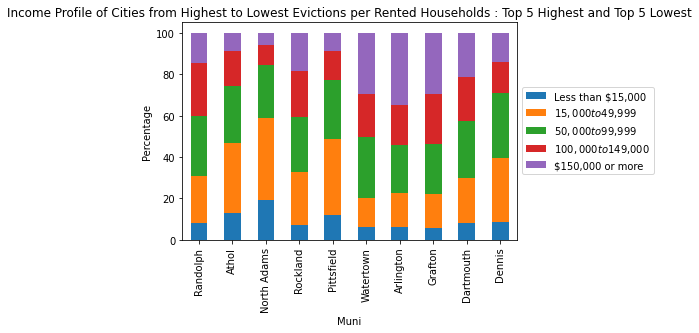

In [30]:
f = plt.figure()

plt.title('Income Profile of Cities from Highest to Lowest Evictions per Rented Households : Top 5 Highest and Top 5 Lowest', color='black')
income_2.plot(x='Muni', kind='bar', stacked=True, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Muni")
plt.ylabel("Percentage")
plt.show()

In [31]:
income_fifty_to_90_k = income_with_rate[income_with_rate["Muni"].isin(fifty_to_90_k['Fall River'].append(pd.Series('Fall River')))]

low_5_3 = income_fifty_to_90_k[income_fifty_to_90_k['eviction_num'] >=10].sort_values('Evictions per Rented Households', ascending=False).head(5).filter(['Muni','Less than $15,000', '$15,000 to $49,999', '$50,000 to $99,999', '$100,000 to $149,000', '$150,000 or more'], axis=1)
top_5_3 = income_fifty_to_90_k[income_fifty_to_90_k['eviction_num'] >=10].sort_values('Evictions per Rented Households').head(5).filter(['Muni','Less than $15,000', '$15,000 to $49,999', '$50,000 to $99,999', '$100,000 to $149,000', '$150,000 or more'], axis=1)

income_3 = pd.concat([low_5_3, top_5_3.reindex(index=top_5_3.index[::-1])])

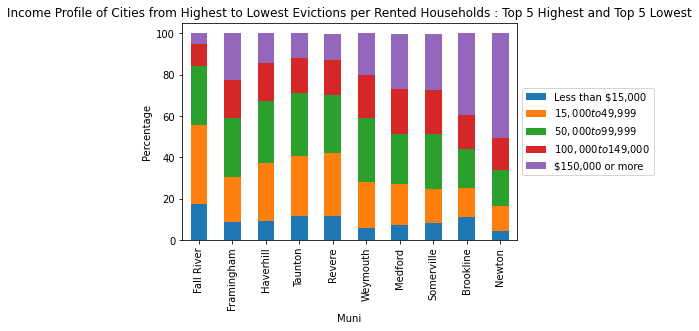

In [32]:
f = plt.figure()

plt.title('Income Profile of Cities from Highest to Lowest Evictions per Rented Households : Top 5 Highest and Top 5 Lowest', color='black')
income_3.plot(x='Muni', kind='bar', stacked=True, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Muni")
plt.ylabel("Percentage")
plt.show()

In [33]:
income_ninty_to_200_k = income_with_rate[income_with_rate["Muni"].isin(ninty_to_200_k['Worcester'].append(pd.Series('Worcester')))]

income_4 = income_ninty_to_200_k[income_ninty_to_200_k['eviction_num'] >=10].sort_values('Evictions per Rented Households', ascending=False).filter(['Muni','Less than $15,000', '$15,000 to $49,999', '$50,000 to $99,999', '$100,000 to $149,000', '$150,000 or more'], axis=1)

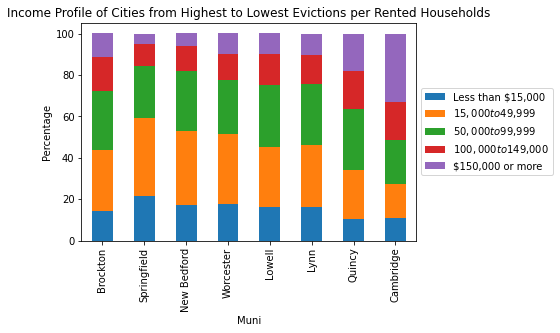

In [34]:
f = plt.figure()

plt.title('Income Profile of Cities from Highest to Lowest Evictions per Rented Households', color='black')
income_4.plot(x='Muni', kind='bar', stacked=True, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Muni")
plt.ylabel("Percentage")
plt.show()

In [35]:
income_one_to_ten_k = income_with_rate[income_with_rate["Muni"].isin(one_to_ten_k.Middleton.append(pd.Series('Middleton')))]

low_per_1 = income_one_to_ten_k[income_one_to_ten_k['eviction_num'] >=20].sort_values('Evictions per Rented Households', ascending=False).head(5).filter(['Muni','Percent of Income Allocated to Rent'], axis=1)
top_per_1 = income_one_to_ten_k[income_one_to_ten_k['eviction_num'] >=10].sort_values('Evictions per Rented Households').head(5).filter(['Muni','Percent of Income Allocated to Rent'], axis=1)

rent_1 = pd.concat([low_per_1, top_per_1.reindex(index=top_per_1.index[::-1])])

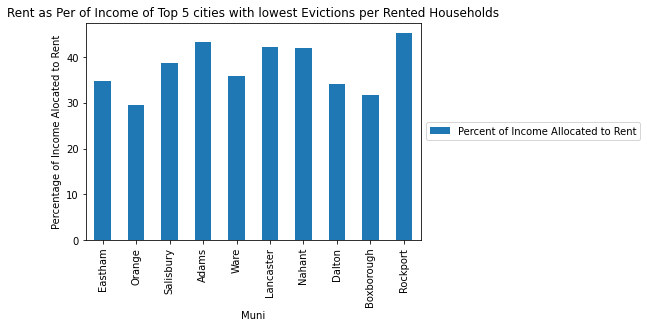

In [28]:
f = plt.figure()

plt.title('Rent as Per of Income of Top 5 cities with lowest Evictions per Rented Households', color='black')
rent_1.plot(x='Muni',kind='bar', stacked=True, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Muni")
plt.ylabel("Percentage of Income Alocated to Rent")
plt.show()

In [29]:
income_ten_to_fifty_k = income_with_rate[income_with_rate["Muni"].isin(ten_to_fifty_k.Everett.append(pd.Series('Everett')))]

low_per_2 = income_ten_to_fifty_k[income_ten_to_fifty_k['eviction_num'] >=10].sort_values('Evictions per Rented Households', ascending=False).head(5).filter(['Muni','Percent of Income Allocated to Rent'], axis=1)
top_per_2 = income_ten_to_fifty_k[income_ten_to_fifty_k['eviction_num'] >=10].sort_values('Evictions per Rented Households').head(5).filter(['Muni','Percent of Income Allocated to Rent'], axis=1)

rent_2 = pd.concat([low_per_2, top_per_2.reindex(index=top_per_2.index[::-1])])

In [34]:
income_ten_to_fifty_k['Percent of Income Allocated to Rent'].median()

35.4

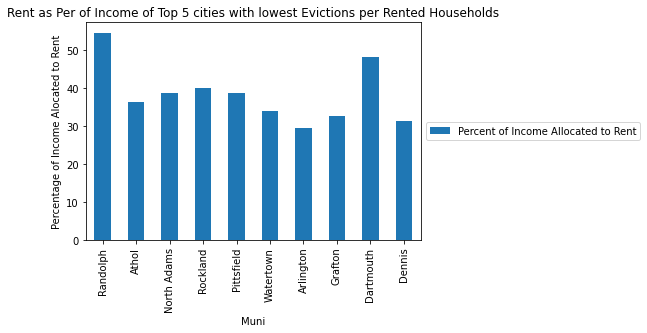

In [30]:
f = plt.figure()

plt.title('Rent as Per of Income of Top 5 cities with lowest Evictions per Rented Households', color='black')
rent_2.plot(x='Muni',kind='bar', stacked=True, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Muni")
plt.ylabel("Percentage of Income Alocated to Rent")
plt.show()

In [31]:
income_fifty_to_90_k = income_with_rate[income_with_rate["Muni"].isin(fifty_to_90_k['Fall River'].append(pd.Series('Fall River')))]

low_per_3 = income_fifty_to_90_k[income_fifty_to_90_k['eviction_num'] >=10].sort_values('Evictions per Rented Households', ascending=False).head(5).filter(['Muni','Percent of Income Allocated to Rent'], axis=1)
top_per_3 = income_fifty_to_90_k[income_fifty_to_90_k['eviction_num'] >=10].sort_values('Evictions per Rented Households').head(5).filter(['Muni','Percent of Income Allocated to Rent'], axis=1)

rent_3 = pd.concat([low_per_3, top_per_3.reindex(index=top_per_3.index[::-1])])

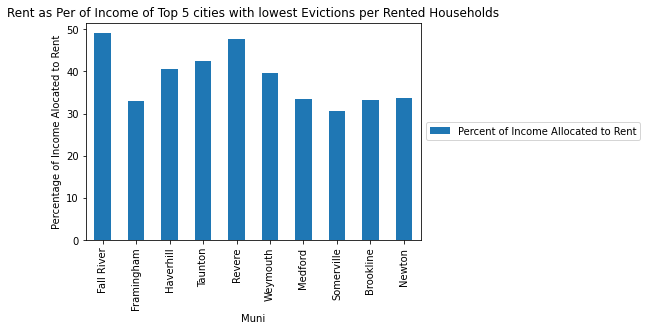

In [32]:
f = plt.figure()

plt.title('Rent as Per of Income of Top 5 cities with lowest Evictions per Rented Households', color='black')
rent_3.plot(x='Muni',kind='bar', stacked=True, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Muni")
plt.ylabel("Percentage of Income Alocated to Rent")
plt.show()

In [33]:
income_ninty_to_200_k = income_with_rate[income_with_rate["Muni"].isin(ninty_to_200_k['Worcester'].append(pd.Series('Worcester')))]

rent_4 = income_ninty_to_200_k[income_ninty_to_200_k['eviction_num'] >=10].sort_values('Evictions per Rented Households', ascending=False).filter(['Muni','Percent of Income Allocated to Rent'], axis=1)

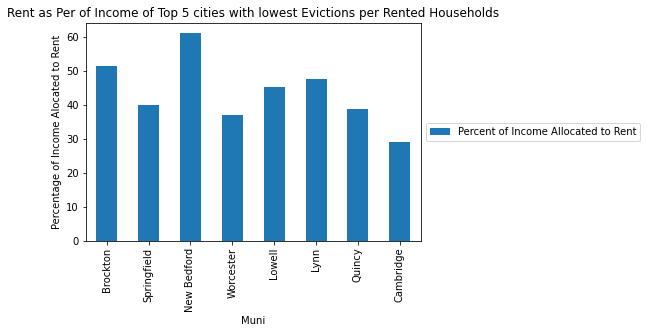

In [34]:
f = plt.figure()

plt.title('Rent as Per of Income of Top 5 cities with lowest Evictions per Rented Households', color='black')
rent_4.plot(x='Muni',kind='bar', stacked=True, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Muni")
plt.ylabel("Percentage of Income Alocated to Rent")
plt.show()

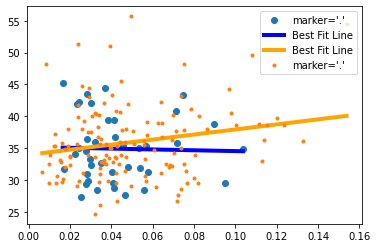

In [36]:
rate_income = linear_model.LinearRegression().fit(np.array(income_one_to_ten_k[income_one_to_ten_k['eviction_num'] >=10]['Evictions per Rented Households'].tolist()).reshape(-1, 1), np.array(income_one_to_ten_k[income_one_to_ten_k['eviction_num'] >=10]["Percent of Income Allocated to Rent"]).tolist())
regression_line = rate_income.predict(np.array(income_one_to_ten_k[income_one_to_ten_k['eviction_num'] >=10]['Evictions per Rented Households'].tolist()).reshape(-1, 1))
plt.plot(income_one_to_ten_k[income_one_to_ten_k['eviction_num'] >=10]['Evictions per Rented Households'], income_one_to_ten_k[income_one_to_ten_k['eviction_num'] >=10]["Percent of Income Allocated to Rent"], 'o',
             label="marker='{0}'".format('.'))
plt.plot(income_one_to_ten_k[income_one_to_ten_k['eviction_num'] >=10]['Evictions per Rented Households'], regression_line, label='Best Fit Line', color='blue', linewidth=4)

rate_income1 = linear_model.LinearRegression().fit(np.array(income_ten_to_fifty_k[income_ten_to_fifty_k['eviction_num'] >=10]['Evictions per Rented Households'].tolist()).reshape(-1, 1), np.array(income_ten_to_fifty_k[income_ten_to_fifty_k['eviction_num'] >=10]["Percent of Income Allocated to Rent"]).tolist())
regression_line1 = rate_income1.predict(np.array(income_ten_to_fifty_k[income_ten_to_fifty_k['eviction_num'] >=10]['Evictions per Rented Households'].tolist()).reshape(-1, 1))
plt.plot(income_ten_to_fifty_k[income_ten_to_fifty_k['eviction_num'] >=10]['Evictions per Rented Households'], regression_line1, label='Best Fit Line', color='orange', linewidth=4)
plt.plot(income_ten_to_fifty_k[income_ten_to_fifty_k['eviction_num'] >=10]['Evictions per Rented Households'], income_ten_to_fifty_k[income_ten_to_fifty_k['eviction_num'] >=10]["Percent of Income Allocated to Rent"], '.',
             label="marker='{0}'".format('.'))

plt.legend(numpoints=1)
plt.show()

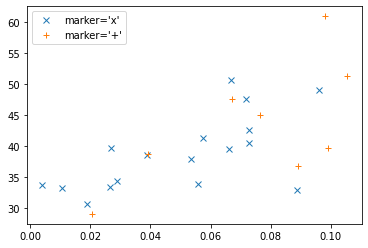

In [37]:
plt.plot(income_fifty_to_90_k['Evictions per Rented Households'], income_fifty_to_90_k['Percent of Income Allocated to Rent'], 'x',
             label="marker='{0}'".format('x'))
plt.plot(income_ninty_to_200_k['Evictions per Rented Households'], income_ninty_to_200_k['Percent of Income Allocated to Rent'], '+',
             label="marker='{0}'".format('+'))
plt.legend(numpoints=1)
# plt.xlim(0, 1.8);
plt.show()